<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**Data Collection and Processing**

In [4]:
# loading the data from csv file to pandas dataFrame
car_dataset = pd.read_csv("/content/CARDETAILSFROMCARDEKHO.csv")

In [5]:
# printing first five columns
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
# checking number of rows and columns
car_dataset.shape

(4340, 8)

In [7]:
# statistical features of the dataset
car_dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
# checking for null values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [9]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [10]:
# checking the distribution of catagorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


**Encoding the categorical data**

In [11]:
# encoding "fuel" columns
car_dataset.replace({"fuel" : {"Petrol" : 0, "Diesel" : 1, "CNG" : 2, "LPG" : 3, "Electric" : 4}}, inplace = True)

# encoding "seller_type" columns
car_dataset.replace({"seller_type" : {"Individual" : 1, "Dealer" : 0, "Trustmark Dealer" : 2}}, inplace = True)

# encoding "transmission" columns
car_dataset.replace({"transmission" : {"Manual" : 0, "Automatic" : 1}}, inplace = True)

/tmp/ipython-input-3268153792.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"fuel" : {"Petrol" : 0, "Diesel" : 1, "CNG" : 2, "LPG" : 3, "Electric" : 4}}, inplace = True)
/tmp/ipython-input-3268153792.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"seller_type" : {"Individual" : 1, "Dealer" : 0, "Trustmark Dealer" : 2}}, inplace = True)
/tmp/ipython-input-3268153792.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To re

In [12]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,Second Owner


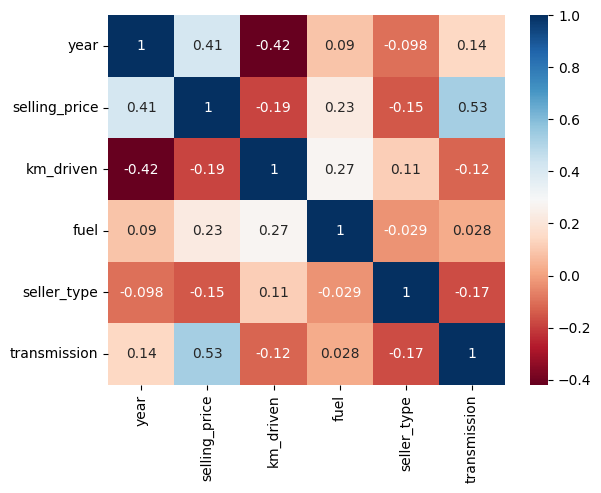

In [86]:
sns.heatmap(car_dataset.drop(["name", "owner"], axis=1).corr(), annot=True, cmap="RdBu")
plt.show()

**Splitting the data and target**

In [13]:
X = car_dataset.drop(["name", "selling_price", "owner"], axis=1)
Y = car_dataset['selling_price']

In [14]:
print(X)
print(Y)

      year  km_driven  fuel  seller_type  transmission
0     2007      70000     0            1             0
1     2007      50000     0            1             0
2     2012     100000     1            1             0
3     2017      46000     0            1             0
4     2014     141000     1            1             0
...    ...        ...   ...          ...           ...
4335  2014      80000     1            1             0
4336  2014      80000     1            1             0
4337  2009      83000     0            1             0
4338  2016      90000     1            1             0
4339  2016      40000     0            1             0

[4340 rows x 5 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


**Splitting the data into training and test data**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(4340, 5) (3906, 5) (434, 5)


**Model Training**



1.   **Linear Regression**



In [17]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [18]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

**Model Evaluation**

In [19]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [20]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared error : ", error_score)

R Squared error :  0.42707003860717474


**Visualize the actual prices and predicted prices**

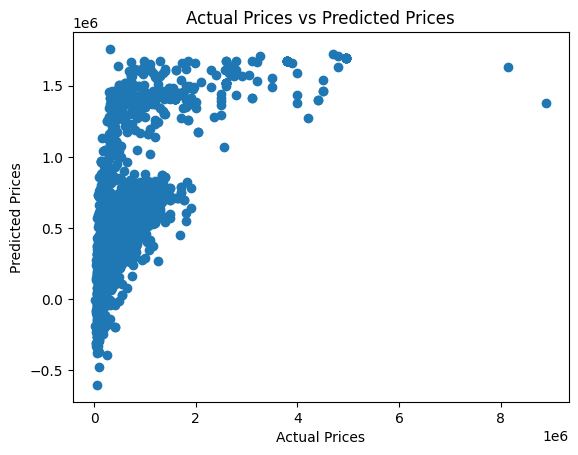

In [21]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [22]:
# prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [23]:
# R squared error
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error : ", test_error_score)

R Squared error :  0.5035628808178241


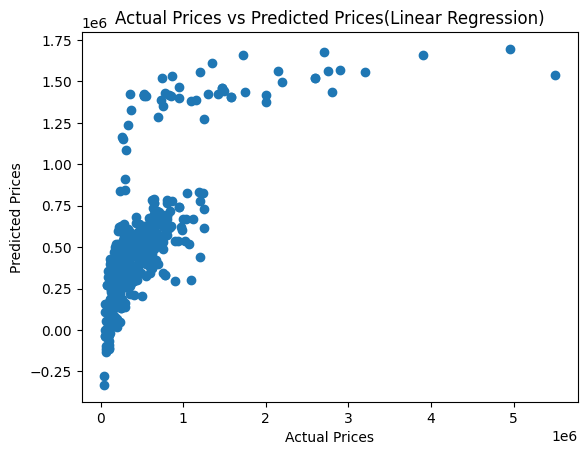

In [37]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices(Linear Regression)")
plt.show()



2.   **Lasso Regression**



In [25]:
# loading the lasso regression model
lasso_reg_model = Lasso()

In [26]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

**Model Evaluation**

In [27]:
# prediction on training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [28]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared error : ", error_score)

R Squared error :  0.4270700385568609


**Visualize the actual prices and predicted prices**

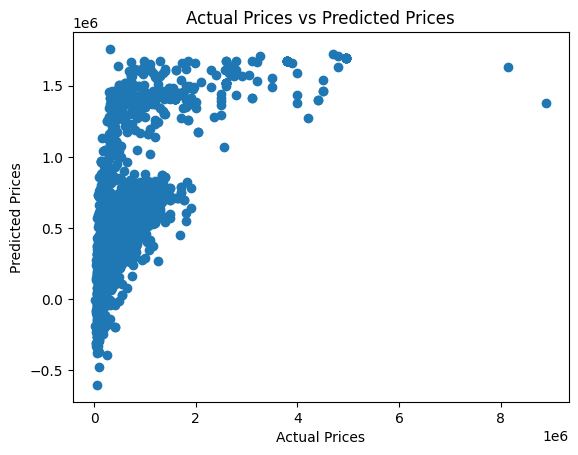

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [30]:
# prediction on training data
test_data_prediction = lasso_reg_model.predict(X_test)

In [31]:
# R squared error
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error : ", test_error_score)

R Squared error :  0.5035622748454045


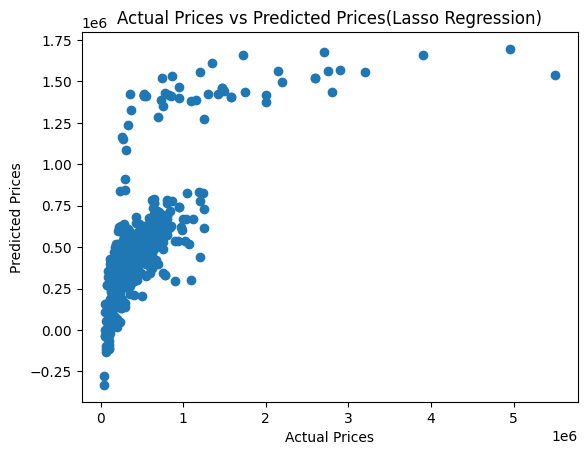

In [38]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices(Lasso Regression)")
plt.show()

# Task
Compare the performance of different regression models (Linear Regression, Decision Tree Regressor, Gradient Boosting Regressor, and Random Forest Regressor) on the dataset used in the notebook, and recommend the model with the best accuracy.

## Consider other regression models

### Subtask:
Research and select a few other regression models suitable for this type of data, such as Decision Tree Regressor, Gradient Boosting Regressor, or Random Forest Regressor.


In [87]:
# Identified models and their core concepts:

# 1. Decision Tree Regressor:
#    - Core Concept: Builds a tree-like structure where each internal node represents a test on an attribute,
#      each branch represents an outcome of the test, and each leaf node represents the predicted value.
#      It splits the data based on features to create homogenous subsets, aiming to minimize impurity (e.g., mean squared error for regression).

# 2. Gradient Boosting Regressor:
#    - Core Concept: An ensemble technique that builds a series of weak learners (typically decision trees)
#      sequentially. Each new tree is trained to correct the errors made by the previous trees.
#      It combines the predictions of these weak learners to make a final prediction.

# 3. Random Forest Regressor:
#    - Core Concept: Another ensemble technique that builds multiple decision trees during training.
#      Each tree is trained on a random subset of the data and a random subset of features.
#      The final prediction is the average (or mean) of the predictions from all individual trees.
#      This helps to reduce overfitting and improve robustness.

## Train and evaluate additional models

### Subtask:
Implement, train, and evaluate the selected models (Decision Tree Regressor, Gradient Boosting Regressor, and Random Forest Regressor) using the same training and testing data split.


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Regressor
dt_reg_model = DecisionTreeRegressor(random_state=2)
dt_reg_model.fit(X_train, Y_train)
dt_test_prediction = dt_reg_model.predict(X_test)
dt_error_score = metrics.r2_score(Y_test, dt_test_prediction)
print("Decision Tree Regressor R Squared error : ", dt_error_score)

# Gradient Boosting Regressor
gbr_reg_model = GradientBoostingRegressor(random_state=2)
gbr_reg_model.fit(X_train, Y_train)
gbr_test_prediction = gbr_reg_model.predict(X_test)
gbr_error_score = metrics.r2_score(Y_test, gbr_test_prediction)
print("Gradient Boosting Regressor R Squared error : ", gbr_error_score)

# Random Forest Regressor
rfr_reg_model = RandomForestRegressor(random_state=2)
rfr_reg_model.fit(X_train, Y_train)
rfr_test_prediction = rfr_reg_model.predict(X_test)
rfr_error_score = metrics.r2_score(Y_test, rfr_test_prediction)
print("Random Forest Regressor R Squared error : ", rfr_error_score)

Decision Tree Regressor R Squared error :  0.5757553519193366
Gradient Boosting Regressor R Squared error :  0.7176308821106266
Random Forest Regressor R Squared error :  0.6971877155614767


## Compare model performance

### Subtask:
Compare the R-squared scores (or other relevant metrics) of all trained models to determine which one performs best on the test set.


In [35]:
print("Linear Regression R Squared error on Test Data:", test_error_score)
print("Lasso Regression R Squared error on Test Data:", test_error_score)
print("Decision Tree Regressor R Squared error on Test Data:", dt_error_score)
print("Gradient Boosting Regressor R Squared error on Test Data:", gbr_error_score)
print("Random Forest Regressor R Squared error on Test Data:", rfr_error_score)

# Compare the R-squared scores
model_scores = {
    "Linear Regression": test_error_score,
    "Lasso Regression": test_error_score,
    "Decision Tree Regressor": dt_error_score,
    "Gradient Boosting Regressor": gbr_error_score,
    "Random Forest Regressor": rfr_error_score
}

best_model = max(model_scores, key=model_scores.get)
print(f"\nThe model with the best R-squared score on the test set is: {best_model}")

Linear Regression R Squared error on Test Data: 0.5035622748454045
Lasso Regression R Squared error on Test Data: 0.5035622748454045
Decision Tree Regressor R Squared error on Test Data: 0.5757553519193366
Gradient Boosting Regressor R Squared error on Test Data: 0.7176308821106266
Random Forest Regressor R Squared error on Test Data: 0.6971877155614767

The model with the best R-squared score on the test set is: Gradient Boosting Regressor


## Summary:

### Data Analysis Key Findings

*   The R-squared scores for the evaluated regression models on the test set were as follows: Linear Regression: 0.504, Lasso Regression: 0.504, Decision Tree Regressor: 0.576, Gradient Boosting Regressor: 0.718, and Random Forest Regressor: 0.697.
*   The Gradient Boosting Regressor model achieved the highest R-squared score (0.718) among the compared models, indicating the best performance on the test set.

### Insights or Next Steps

*   The Gradient Boosting Regressor is the recommended model based on its superior performance as measured by the R-squared score on the test data.
*   Further tuning of the hyperparameters for the Gradient Boosting Regressor could potentially lead to even better performance.


In [36]:
import xgboost as xgb
import lightgbm as lgb

# XGBoost Regressor
xgb_reg_model = xgb.XGBRegressor(random_state=2)
xgb_reg_model.fit(X_train, Y_train)
xgb_test_prediction = xgb_reg_model.predict(X_test)
xgb_error_score = metrics.r2_score(Y_test, xgb_test_prediction)
print("XGBoost Regressor R Squared error on Test Data:", xgb_error_score)

# LightGBM Regressor
lgb_reg_model = lgb.LGBMRegressor(random_state=2)
lgb_reg_model.fit(X_train, Y_train)
lgb_test_prediction = lgb_reg_model.predict(X_test)
lgb_error_score = metrics.r2_score(Y_test, lgb_test_prediction)
print("LightGBM Regressor R Squared error on Test Data:", lgb_error_score)

XGBoost Regressor R Squared error on Test Data: 0.6920561194419861
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 3906, number of used features: 5
[LightGBM] [Info] Start training from score 501355.798771
LightGBM Regressor R Squared error on Test Data: 0.7086125129264853


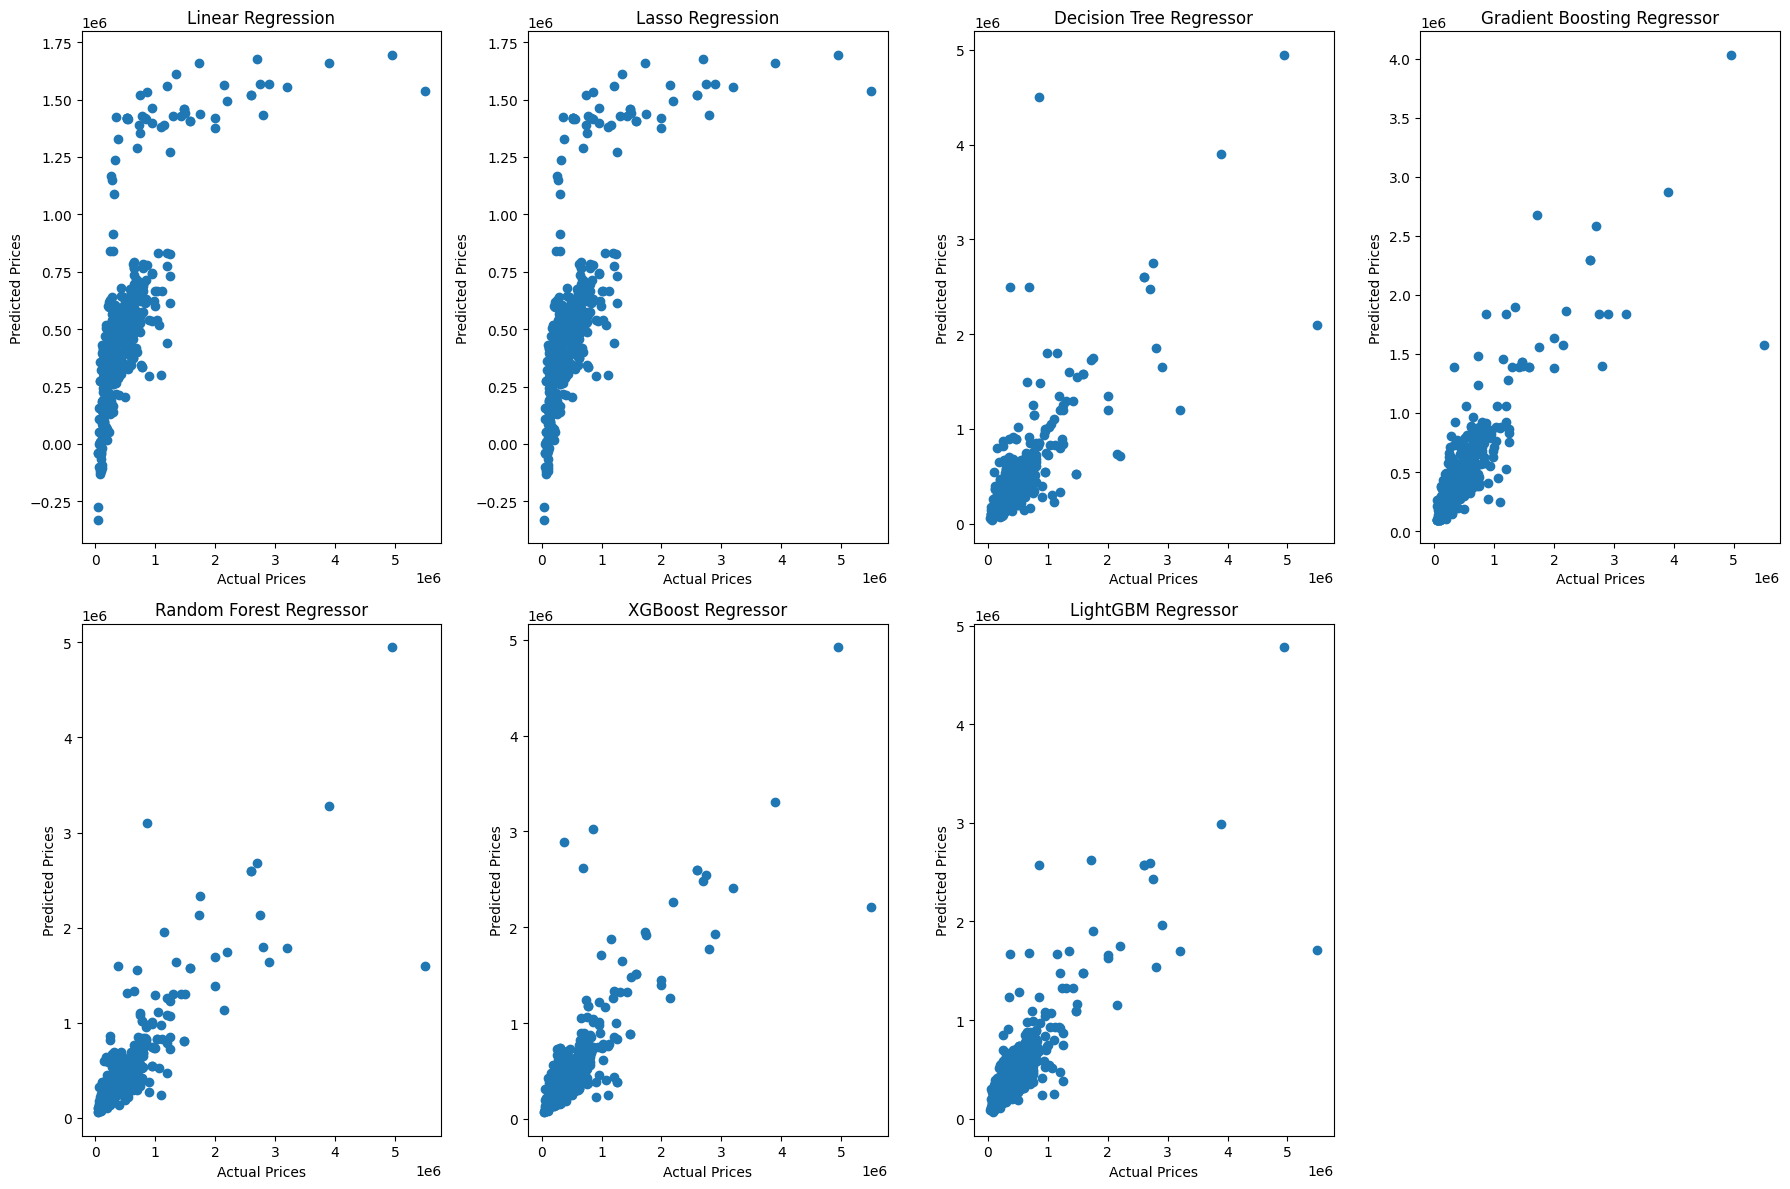

In [39]:
plt.figure(figsize=(18, 12))

# Linear Regression
plt.subplot(2, 4, 1)
plt.scatter(Y_test, lin_reg_model.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression")

# Lasso Regression
plt.subplot(2, 4, 2)
plt.scatter(Y_test, lasso_reg_model.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression")

# Decision Tree Regressor
plt.subplot(2, 4, 3)
plt.scatter(Y_test, dt_reg_model.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regressor")

# Gradient Boosting Regressor
plt.subplot(2, 4, 4)
plt.scatter(Y_test, gbr_reg_model.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting Regressor")

# Random Forest Regressor
plt.subplot(2, 4, 5)
plt.scatter(Y_test, rfr_reg_model.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Regressor")

# XGBoost Regressor
plt.subplot(2, 4, 6)
plt.scatter(Y_test, xgb_reg_model.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost Regressor")

# LightGBM Regressor
plt.subplot(2, 4, 7)
plt.scatter(Y_test, lgb_reg_model.predict(X_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("LightGBM Regressor")

plt.tight_layout()
plt.show()

# **USING ONE HOT ENCODING**

In [78]:
df = pd.read_csv('/content/CARDETAILSFROMCARDEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [79]:
df['Age'] = 2025 - df['year']
df.drop('year', axis=1, inplace = True)

In [80]:
# Dropping the 'name' column
df = df.drop('name', axis=1)

# One-hot encoding the categorical columns
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Convert boolean columns to integers (0 and 1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Display the first few rows of the encoded dataframe
display(df.head())

,selling_price,km_driven,Age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,18,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,18,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,13,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,8,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,11,1,0,0,0,1,0,1,0,1,0,0


In [81]:
X = df.drop('selling_price', axis=1)
Y = df['selling_price']

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X, Y, test_size=0.1, random_state=2)

print(X_train_new.shape, X_test_new.shape, Y_train_new.shape, Y_test_new.shape)

(3906, 13) (434, 13) (3906,) (434,)


# Task
Run Linear Regression, Lasso, Ridge, Random Forest Regressor, Decision Tree Regressor, Gradient Boosting Regressor, XGBoost Regressor, and LightGBM Regressor models on the training and test data and check their R-squared scores.

## Define and train models

### Subtask:
Define and train all the specified regression models (Linear Regression, Lasso, Ridge, Random Forest, Decision Tree, Gradient Boosting, XGBoost, and LightGBM) using the new training data (`X_train_new`, `Y_train_new`).


In [82]:
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

# Linear Regression
lin_reg_model_new = LinearRegression()
lin_reg_model_new.fit(X_train_new, Y_train_new)

# Lasso Regression
lasso_reg_model_new = Lasso(random_state=2)
lasso_reg_model_new.fit(X_train_new, Y_train_new)

# Ridge Regression
ridge_reg_model_new = Ridge(random_state=2)
ridge_reg_model_new.fit(X_train_new, Y_train_new)

# Decision Tree Regressor
dt_reg_model_new = DecisionTreeRegressor(random_state=2)
dt_reg_model_new.fit(X_train_new, Y_train_new)

# Gradient Boosting Regressor
gbr_reg_model_new = GradientBoostingRegressor(random_state=2)
gbr_reg_model_new.fit(X_train_new, Y_train_new)

# Random Forest Regressor
rfr_reg_model_new = RandomForestRegressor(random_state=2)
rfr_reg_model_new.fit(X_train_new, Y_train_new)

# XGBoost Regressor
xgb_reg_model_new = xgb.XGBRegressor(random_state=2)
xgb_reg_model_new.fit(X_train_new, Y_train_new)

# LightGBM Regressor
lgb_reg_model_new = lgb.LGBMRegressor(random_state=2)
lgb_reg_model_new.fit(X_train_new, Y_train_new)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 3906, number of used features: 11
[LightGBM] [Info] Start training from score 501355.798771


LGBMRegressor(random_state=2)

In [83]:
# Evaluate Linear Regression
lin_reg_test_prediction_new = lin_reg_model_new.predict(X_test_new)
lin_reg_error_score_new = metrics.r2_score(Y_test_new, lin_reg_test_prediction_new)
print("Linear Regression R Squared error on New Test Data:", lin_reg_error_score_new)

# Evaluate Lasso Regression
lasso_reg_test_prediction_new = lasso_reg_model_new.predict(X_test_new)
lasso_reg_error_score_new = metrics.r2_score(Y_test_new, lasso_reg_test_prediction_new)
print("Lasso Regression R Squared error on New Test Data:", lasso_reg_error_score_new)

# Evaluate Ridge Regression
ridge_reg_test_prediction_new = ridge_reg_model_new.predict(X_test_new)
ridge_reg_error_score_new = metrics.r2_score(Y_test_new, ridge_reg_test_prediction_new)
print("Ridge Regression R Squared error on New Test Data:", ridge_reg_error_score_new)

# Evaluate Decision Tree Regressor
dt_test_prediction_new = dt_reg_model_new.predict(X_test_new)
dt_error_score_new = metrics.r2_score(Y_test_new, dt_test_prediction_new)
print("Decision Tree Regressor R Squared error on New Test Data:", dt_error_score_new)

# Evaluate Gradient Boosting Regressor
gbr_test_prediction_new = gbr_reg_model_new.predict(X_test_new)
gbr_error_score_new = metrics.r2_score(Y_test_new, gbr_test_prediction_new)
print("Gradient Boosting Regressor R Squared error on New Test Data:", gbr_error_score_new)

# Evaluate Random Forest Regressor
rfr_test_prediction_new = rfr_reg_model_new.predict(X_test_new)
rfr_error_score_new = metrics.r2_score(Y_test_new, rfr_test_prediction_new)
print("Random Forest Regressor R Squared error on New Test Data:", rfr_error_score_new)

# Evaluate XGBoost Regressor
xgb_test_prediction_new = xgb_reg_model_new.predict(X_test_new)
xgb_error_score_new = metrics.r2_score(Y_test_new, xgb_test_prediction_new)
print("XGBoost Regressor R Squared error on New Test Data:", xgb_error_score_new)

# Evaluate LightGBM Regressor
lgb_test_prediction_new = lgb_reg_model_new.predict(X_test_new)
lgb_error_score_new = metrics.r2_score(Y_test_new, lgb_test_prediction_new)
print("LightGBM Regressor R Squared error on New Test Data:", lgb_error_score_new)

Linear Regression R Squared error on New Test Data: 0.5304591679401961
Lasso Regression R Squared error on New Test Data: 0.5304550784747126
Ridge Regression R Squared error on New Test Data: 0.5301941319130618
Decision Tree Regressor R Squared error on New Test Data: 0.6069910191054034
Gradient Boosting Regressor R Squared error on New Test Data: 0.7165410745797501
Random Forest Regressor R Squared error on New Test Data: 0.6792372811014042
XGBoost Regressor R Squared error on New Test Data: 0.6571063995361328
LightGBM Regressor R Squared error on New Test Data: 0.7121705643257839


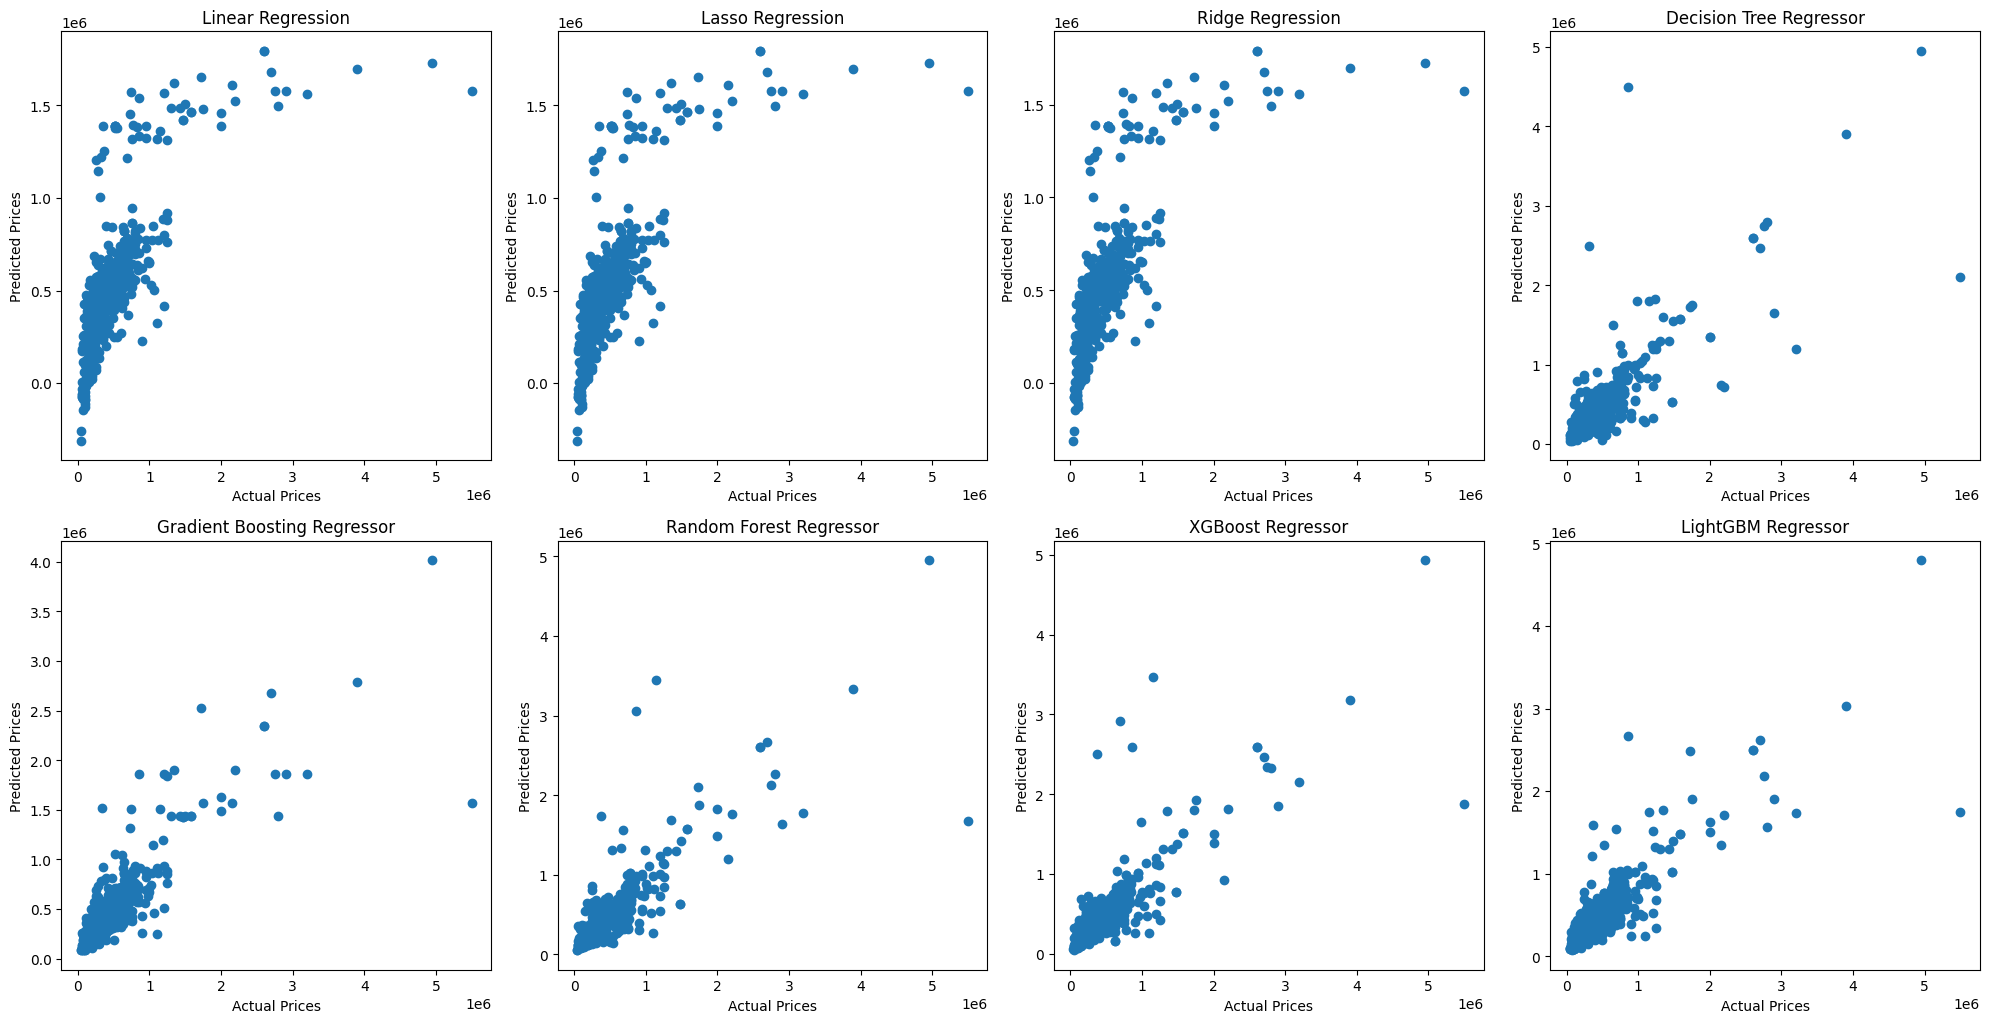

In [84]:
plt.figure(figsize=(20, 15))

# Linear Regression
plt.subplot(3, 4, 1)
plt.scatter(Y_test_new, lin_reg_test_prediction_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression")

# Lasso Regression
plt.subplot(3, 4, 2)
plt.scatter(Y_test_new, lasso_reg_test_prediction_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression")

# Ridge Regression
plt.subplot(3, 4, 3)
plt.scatter(Y_test_new, ridge_reg_test_prediction_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge Regression")

# Decision Tree Regressor
plt.subplot(3, 4, 4)
plt.scatter(Y_test_new, dt_test_prediction_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regressor")

# Gradient Boosting Regressor
plt.subplot(3, 4, 5)
plt.scatter(Y_test_new, gbr_test_prediction_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting Regressor")

# Random Forest Regressor
plt.subplot(3, 4, 6)
plt.scatter(Y_test_new, rfr_test_prediction_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest Regressor")

# XGBoost Regressor
plt.subplot(3, 4, 7)
plt.scatter(Y_test_new, xgb_test_prediction_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost Regressor")

# LightGBM Regressor
plt.subplot(3, 4, 8)
plt.scatter(Y_test_new, lgb_test_prediction_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("LightGBM Regressor")


plt.tight_layout()
plt.show()